In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [169]:
plt.style.use('ggplot')
%matplotlib inline

# Intro
Adapted from the fantastic blog post
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/
# Create dataset
Start with 4 time series and "unpivot" the table to get a dataframe with
- a datetime column
- a categorical column
- a numerical column

In [170]:
data = np.random.randn(4, 365).cumsum(axis=1)
dt = pd.date_range('2015-01-01', '2015-12-31')
timeseries_df = pd.DataFrame(data=dict(A=data[0], B=data[1], C=data[2], D=data[3]), index=dt)
timeseries_df.head()

,A,B,C,D
2015-01-01,-1.233421,-1.258108,-1.050446,0.455273
2015-01-02,0.040415,-0.006151,-0.319353,0.333737
2015-01-03,0.468907,-0.482195,0.041858,-0.879111
2015-01-04,-0.312804,-0.896031,-0.768521,-1.120162
2015-01-05,0.125168,-1.971744,-2.189589,-2.520361


In [171]:
def alternative_dataset():
    import pandas.util.testing as tm; 
    tm.N = 100
    return tm.makeTimeDataFrame()

In [172]:
def unpivot(frame):
    data = {'value' : frame.values.ravel('F'),
            'kind' : np.asarray(frame.columns).repeat(frame.shape[0]),
            'dt' : np.tile(np.asarray(frame.index), frame.shape[1])}
    return pd.DataFrame(data, columns=['dt', 'kind', 'value'])
df = unpivot(timeseries_df)
df.head()


,dt,kind,value
0,2015-01-01,A,-1.233421
1,2015-01-02,A,0.040415
2,2015-01-03,A,0.468907
3,2015-01-04,A,-0.312804
4,2015-01-05,A,0.125168


In [173]:
df.tail()

,dt,kind,value
1455,2015-12-27,D,-15.830646
1456,2015-12-28,D,-15.615452
1457,2015-12-29,D,-15.959638
1458,2015-12-30,D,-17.493797
1459,2015-12-31,D,-16.028300


# Lines plots with matplotlib
## Using a loop

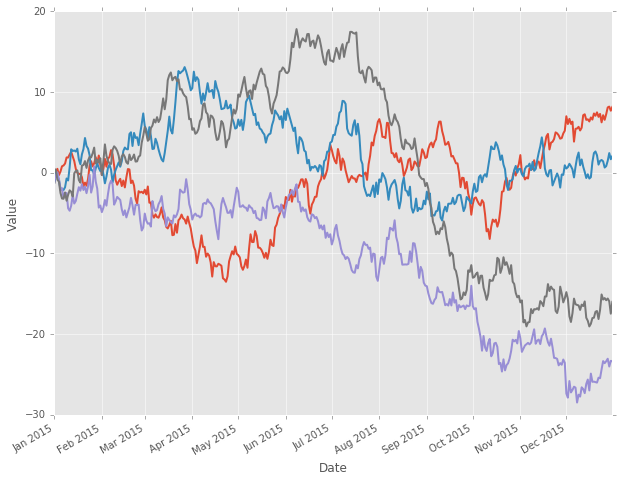

In [176]:
fig = plt.figure(1, figsize=(10,8))
for k in df.kind.unique():
    data = df[df.kind == k]
    plt.plot(data.dt, data.value, lw=2)
fig.autofmt_xdate()
plt.ylabel('Value')
plt.xlabel('Date');

## Using a pivot
We can pivot the data to get a dataframe where each column is a series to be ploted. These can be plotted directly by Matplotlib. 

In [183]:
dfp = df.pivot(index='dt', columns='kind', values='value')
dfp.head()

kind,A,B,C,D
dt,,,,
2015-01-01,-1.233421,-1.258108,-1.050446,0.455273
2015-01-02,0.040415,-0.006151,-0.319353,0.333737
2015-01-03,0.468907,-0.482195,0.041858,-0.879111
2015-01-04,-0.312804,-0.896031,-0.768521,-1.120162
2015-01-05,0.125168,-1.971744,-2.189589,-2.520361


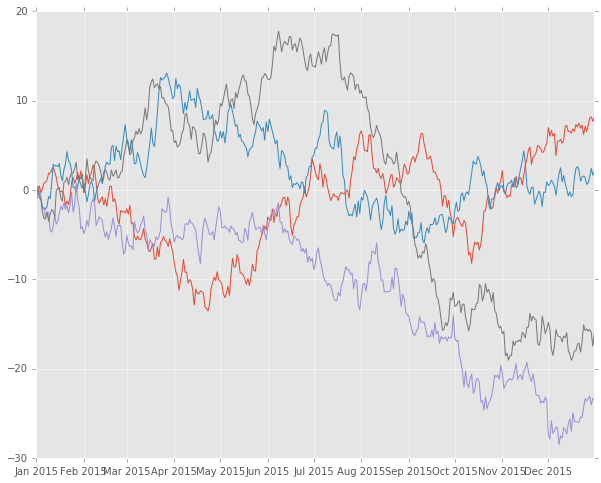

In [185]:
plt.figure(2, figsize=(10, 8))
plt.plot(dfp);

In [178]:
pd.__version__

'0.19.0'

In [179]:
pd.pivot?